In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['TPR','TNR','FPR','FNR','AUC','G-Mean','F1', 'G-Measure']
report = pd.DataFrame(columns = column_names)
columns = ['id',
 #'Nombre',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento',
 'Precio_cat']
columns_test = ['id',
 #'Nombre',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento']
seed = 2232527064

In [3]:
import math

def cmdata_report(cm, classifier, data):# add a df as parameter
    total = cm.sum()
    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    ratio = (cm[0,0]+cm[1,1])/total
    PPV = TP/(TP+FP)
    AUC = (1 + TPR - FPR)/2
    GMEAN = math.sqrt(TNR*TPR)
    F1 = 2*TP/(2*TP+FP+FN)
    GMEASURE = math.sqrt(PPV*TPR)
    
    s = pd.Series([TPR,TNR,FPR,FNR,AUC,GMEAN,F1,GMEASURE], name=classifier, index=report.columns)
    df = data.append(s)
    return df

In [4]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [5]:
train = pd.read_csv("../csv/train.csv", na_values='?')
test = pd.read_csv("../csv/test.csv", na_values='?')

In [6]:
train.isnull().sum()

id                72
Nombre            72
Ciudad            72
Año               72
Kilometros        72
Combustible       72
Tipo_marchas      72
Mano              72
Consumo           73
Motor_CC         101
Potencia         175
Asientos         106
Descuento       4160
Precio_cat         0
dtype: int64

In [7]:
train.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3


In [8]:
'''rows = train.Nombre.tolist()
marcas = []
r = 0
for i in rows:
    if (type(i) == str):
        #print(i.split(' ', 1)[0])
        #marcas.append(i.split(' ', 1)[0])
        train.at[r,'Nombre'] = i.split(' ', 1)[0]
        r += 1
train.head()'''

"rows = train.Nombre.tolist()\nmarcas = []\nr = 0\nfor i in rows:\n    if (type(i) == str):\n        #print(i.split(' ', 1)[0])\n        #marcas.append(i.split(' ', 1)[0])\n        train.at[r,'Nombre'] = i.split(' ', 1)[0]\n        r += 1\ntrain.head()"

In [9]:
train.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3


In [10]:
train = train[columns].copy()
test = test[columns_test].copy()
print(test.shape)

(1159, 10)


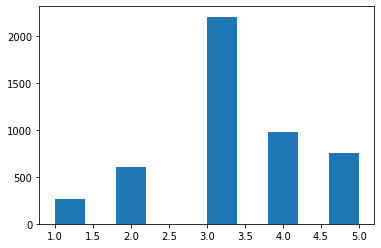

Class: 3, ocurrences: 2211 -> 45.88088815106869%
Class: 4, ocurrences: 978 -> 20.29466694334924%
Class: 5, ocurrences: 759 -> 15.750155633948951%
Class: 2, ocurrences: 602 -> 12.492218302552397%
Class: 1, ocurrences: 269 -> 5.582070969080722%


In [11]:
import matplotlib.pyplot as plt

plt.hist(train['Precio_cat'])
plt.show()

classes = train['Precio_cat'].value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

initial_n = len(train['Precio_cat'].index)

In [12]:
cols = train.columns.tolist()
print(cols)

['id', 'Año', 'Kilometros', 'Combustible', 'Mano', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos', 'Descuento', 'Precio_cat']


In [13]:
cols = train.columns.tolist()
for i in cols:
    print(i)
    print(train[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012. 2016. 2013. 2017. 2009. 2014. 2011. 2015. 2008. 2010. 2018. 2006.
   nan 2019. 2005. 2007. 2003. 2004. 2001. 1998. 2002. 2000. 1999.]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
['Diesel' 'Petrol' nan 'CNG' 'LPG' 'Electric']
Mano
['First' 'Second' 'Third' nan 'Fourth & Above']
Consumo
['23.4 kmpl' '20.51 kmpl' '25.32 kmpl' '18.5 kmpl' '18.7 kmpl' '17.8 kmpl'
 '16.8 kmpl' '18.6 kmpl' '25.2 kmpl' '10.91 kmpl' '12.99 kmpl' '17.5 kmpl'
 '25.8 kmpl' '18.25 kmpl' '10.0 kmpl' '11.5 kmpl' '19.1 kmpl' '14.21 kmpl'
 '14.16 kmpl' '17.43 kmpl' '18.0 kmpl' '15.7 kmpl' '16.0 kmpl'
 '21.43 kmpl' '21.64 kmpl' '20.73 kmpl' '14.0 kmpl' '17.9 kmpl'
 '28.4 kmpl' '15.96 kmpl' nan '23.65 kmpl' '20.36 kmpl' '21.9 kmpl'
 '22.95 kmpl' '23.59 kmpl' '17.57 kmpl' '21.27 kmpl' '17.3 kmpl'
 '22.32 kmpl' '18.9 kmpl' '24.7 kmpl' '24.0 kmpl' '11.0 kmpl' '13.0 kmpl'
 '16.47 kmpl' '17.21 kmpl' '13.6 kmpl' '26.59 km

In [14]:
train.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,Diesel,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,2016.0,4800.0,Petrol,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,2016.0,26000.0,Diesel,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,2013.0,56127.0,Petrol,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,2017.0,41981.0,Petrol,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3


# Preprocessing data

First of all, we get all numbers from string format

In [15]:
train['Descuento'] = train['Descuento'].fillna(0)
test['Descuento'] = test['Descuento'].fillna(0)

train['Combustible'].fillna(value=train['Combustible'].value_counts().index[0],inplace =True)
train['Mano'].fillna(value=train['Mano'].value_counts().index[0],inplace =True)
#train['Nombre'].fillna(value=train['Nombre'].value_counts().index[0],inplace =True)

In [16]:
train['Combustible'].value_counts(dropna=False)

Diesel      2618
Petrol      2151
CNG           42
LPG            7
Electric       1
Name: Combustible, dtype: int64

In [17]:
import re
import math

for index, row in train.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        train.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        train.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        train.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
for index, row in test.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        test.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        test.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        test.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
train['Consumo'] = train['Consumo'].astype(float)
train['Motor_CC'] = train['Motor_CC'].astype(float)
train['Potencia'] = train['Potencia'].astype(float)

test['Consumo'] = test['Consumo'].astype(float)
test['Motor_CC'] = test['Motor_CC'].astype(float)
test['Potencia'] = test['Potencia'].astype(float)

train.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,Diesel,First,23.40,1248.0,74.0,5.0,0.0,3
1,2.0,2016.0,4800.0,Petrol,First,20.51,998.0,67.0,5.0,0.0,3
2,3.0,2016.0,26000.0,Diesel,First,25.32,1198.0,77.0,6.0,0.0,3
3,4.0,2013.0,56127.0,Petrol,First,18.50,1197.0,80.0,5.0,0.0,3
4,5.0,2017.0,41981.0,Petrol,First,18.70,1199.0,88.0,5.0,0.0,3


In [18]:
from sklearn import preprocessing
le_combustible = preprocessing.LabelEncoder()
le_mano = preprocessing.LabelEncoder()

data = train.copy()
#data_without_nan = data_without_nan.dropna()
data['Combustible'] = le_combustible.fit_transform(data['Combustible'])
data['Mano'] = le_mano.fit_transform(data['Mano'])
#data['Nombre'] = le_mano.fit_transform(data['Nombre'])

cols1 = data.select_dtypes([np.number]).columns
cols2 = data.select_dtypes(exclude = [np.number]).columns
data[cols1] = data[cols1].fillna(data[cols1].mean())
data[cols2] = data[cols2].fillna(data[cols2].mode().iloc[0])

test['Combustible'] = le_combustible.fit_transform(test['Combustible'])
test['Mano'] = le_mano.fit_transform(test['Mano'])
#test['Nombre'] = le_mano.fit_transform(test['Nombre'])

In [19]:
data.head()

,id,Año,Kilometros,Combustible,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,2012.0,83000.0,1,0,23.40,1248.0,74.0,5.0,0.0,3
1,2.0,2016.0,4800.0,4,0,20.51,998.0,67.0,5.0,0.0,3
2,3.0,2016.0,26000.0,1,0,25.32,1198.0,77.0,6.0,0.0,3
3,4.0,2013.0,56127.0,4,0,18.50,1197.0,80.0,5.0,0.0,3
4,5.0,2017.0,41981.0,4,0,18.70,1199.0,88.0,5.0,0.0,3


# erase all missing data

In [20]:
#data_without_nan = data_without_nan.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
test_id = test.id
#test = test.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
#target = data.Precio_cat
data = data.drop('id', axis=1)
test = test.drop('id', axis=1)

X = data.drop('Precio_cat', axis=1)
y = data['Precio_cat']

In [21]:
import smote_variants as sv
'''
noise_filter= sv.EditedNearestNeighbors()
X_, y_ = noise_filter.remove_noise(X.to_numpy(), y.to_numpy())
X = pd.DataFrame(data=X_, columns=X.columns)
y = pd.Series(y_, name=y.name)

plt.hist(y)
plt.show()

classes = y.value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")
noise_n = len(y.index)
'''

'\nnoise_filter= sv.EditedNearestNeighbors()\nX_, y_ = noise_filter.remove_noise(X.to_numpy(), y.to_numpy())\nX = pd.DataFrame(data=X_, columns=X.columns)\ny = pd.Series(y_, name=y.name)\n\nplt.hist(y)\nplt.show()\n\nclasses = y.value_counts(ascending=False)\ntotal = classes.sum()\nfor i in range(classes.size):\n    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")\nnoise_n = len(y.index)\n'

In [22]:
#oversampler = sv.V_SYNTH(random_state=seed)
#oversampler = sv.MDO(random_state=seed) done
#oversampler = sv.PSO(random_state=seed)
#oversampler = sv.AMSCO(random_state=seed)
#oversampler = sv.DSRBF(random_state=seed, proportion=0.4)
#oversampler = sv.kmeans_SMOTE(random_state=seed,  proportion=0.4)
#oversampler = sv.MSMOTE(random_state=seed)
'''oversampler = sv.polynom_fit_SMOTE(random_state=seed, proportion=0.1) #test # topoplogy (str) – ‘star’/’bus’/’mesh’

X, y = sv.MulticlassOversampling(
    oversampler=oversampler).sample(X_.to_numpy(), y_.to_numpy())

X = pd.DataFrame(data=X, columns=X_.columns)
y = pd.Series(y, name=y_.name)'''


target = y

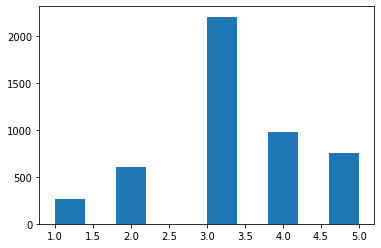

Class: 3, ocurrences: 2211 -> 45.88088815106869%
Class: 4, ocurrences: 978 -> 20.29466694334924%
Class: 5, ocurrences: 759 -> 15.750155633948951%
Class: 2, ocurrences: 602 -> 12.492218302552397%
Class: 1, ocurrences: 269 -> 5.582070969080722%


In [23]:
plt.hist(target)
plt.show()

classes = target.value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

In [24]:
#print("Initial instances: "+str(initial_n))
#print("After noise filter: "+str(noise_n))
#print("Post SMOTE-MulticlassOversampling with DSRBF: "+str(len(y.index)))

Now, train the model

In [25]:
import random
# get random seed parameter for classifiers
#random_seed = random.randrange(2**32 - 1)
#seed = random_seed
# seed used at kaggle submission
#seed = 2232527064
#print("random_seed: "+str(random_seed))
from sklearn.model_selection import StratifiedKFold
cv_ = StratifiedKFold(n_splits=5, shuffle=True)
print("Actual seed: "+str(seed))

Actual seed: 2232527064


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

In [27]:
'''
import lightgbm as lgb
param_grid = {
    'colsample_bytree' : np.arange(start=0.5, stop=1.1, step=0.1),
    'subsample' : np.arange(start=0.5, stop=1.1, step=0.1),
    'num_leaves' : [6,8,10,11,12]
    }

clf = lgb.LGBMClassifier(objective='multiclass', random_state=seed, n_jobs=-1,
                        class_weight='balanced')
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv_)
CV_rfc.fit(X_,y)
CV_rfc.best_params_

# (objective='multiclass', random_state=seed, n_jobs=-1,
                     #   subsample=0.5,
                     #   class_weight='balanced',
                     #   colsample_bytree=0.5,
                     #   num_leaves=70)'''

"\nimport lightgbm as lgb\nparam_grid = {\n    'colsample_bytree' : np.arange(start=0.5, stop=1.1, step=0.1),\n    'subsample' : np.arange(start=0.5, stop=1.1, step=0.1),\n    'num_leaves' : [6,8,10,11,12]\n    }\n\nclf = lgb.LGBMClassifier(objective='multiclass', random_state=seed, n_jobs=-1,\n                        class_weight='balanced')\nfrom sklearn.model_selection import GridSearchCV\nCV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv_)\nCV_rfc.fit(X_,y)\nCV_rfc.best_params_\n\n# (objective='multiclass', random_state=seed, n_jobs=-1,\n                     #   subsample=0.5,\n                     #   class_weight='balanced',\n                     #   colsample_bytree=0.5,\n                     #   num_leaves=70)"

In [28]:
# {'colsample_bytree': 0.7, 'subsample': 0.5}

In [29]:
from imblearn.combine import SMOTETomek 

#smt = SMOTETomek(sampling_strategy={1: 600, 2: 602, 3: 2211, 4: 978, 5: 759}, n_jobs=-1)
smt = SMOTETomek(sampling_strategy='auto', n_jobs=-1)
X_smote, y_smote = smt.fit_sample(X, y)

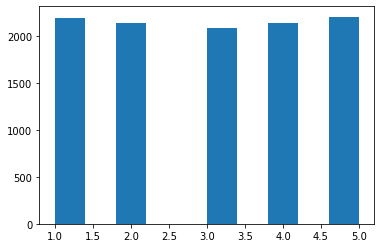

Class: 5, ocurrences: 2202 -> 20.50088446140955%
Class: 1, ocurrences: 2191 -> 20.398473140303512%
Class: 4, ocurrences: 2140 -> 19.923657015175497%
Class: 2, ocurrences: 2131 -> 19.839865934270552%
Class: 3, ocurrences: 2077 -> 19.337119448840888%


In [30]:
import matplotlib.pyplot as plt

plt.hist(y_smote)
plt.show()

classes = y_smote.value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

initial_n = len(train['Precio_cat'].index)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
        X_smote, y_smote, random_state=seed, test_size=0.1
    )

In [32]:
'''smt = SMOTETomek(sampling_strategy={1: 471, 2: 482, 3: 1764, 4: 792, 5: 600}, n_jobs=-1)
#smt = SMOTETomek(sampling_strategy='auto', n_jobs=-1)
X_smote, y_smote = smt.fit_sample(X_train, y_train)'''

"smt = SMOTETomek(sampling_strategy={1: 471, 2: 482, 3: 1764, 4: 792, 5: 600}, n_jobs=-1)\n#smt = SMOTETomek(sampling_strategy='auto', n_jobs=-1)\nX_smote, y_smote = smt.fit_sample(X_train, y_train)"

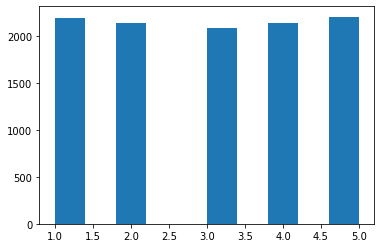

Class: 5, ocurrences: 2202 -> 20.50088446140955%
Class: 1, ocurrences: 2191 -> 20.398473140303512%
Class: 4, ocurrences: 2140 -> 19.923657015175497%
Class: 2, ocurrences: 2131 -> 19.839865934270552%
Class: 3, ocurrences: 2077 -> 19.337119448840888%


In [33]:
import matplotlib.pyplot as plt

plt.hist(y_smote)
plt.show()

classes = y_smote.value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

initial_n = len(train['Precio_cat'].index)

In [34]:
import lightgbm as lgb
#{'colsample_bytree': 0.5, 'num_leaves': 10, 'subsample': 0.5}
clf = lgb.LGBMClassifier(random_state=seed, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y_val, y_pred)
rf_report = get_classification_report(y_val, y_pred)
report = cmdata_report(rf_cmatrix, 'split', report)

In [35]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, X_smote, y_smote, cv=cv_, n_jobs=-1)

rf_cmatrix = confusion_matrix(y_smote, y_pred)
rf_report = get_classification_report(y_smote, y_pred)
report = cmdata_report(rf_cmatrix, 'all dataset', report)

In [36]:
report

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
split,0.919811,0.916667,0.083333,0.080189,0.918239,0.918238,0.919811,0.919811
all dataset,0.942555,0.938786,0.061214,0.057445,0.940670,0.940669,0.943205,0.943206


In [37]:
rf_report

,precision,recall,f1-score,support
5,0.963013,0.969573,0.966282,2202.000000
1,0.939103,0.936102,0.937600,2191.000000
accuracy,0.904292,0.904292,0.904292,0.904292
weighted avg,0.904149,0.904292,0.904123,10741.000000
macro avg,0.903355,0.903291,0.903223,10741.000000
4,0.894640,0.904673,0.899628,2140.000000
2,0.857863,0.877992,0.867811,2131.000000
3,0.862155,0.828117,0.844794,2077.000000


And get the prediction

In [38]:
target.head()

0    3
1    3
2    3
3    3
4    3
Name: Precio_cat, dtype: int64

In [39]:
prediction = clf.predict(test)

In [40]:
prediction

array([5, 2, 2, ..., 4, 5, 5])

In [41]:
test_id

0       4820
1       4821
2       4822
3       4823
4       4824
        ... 
1154    5974
1155    5975
1156    5976
1157    5977
1158    5978
Name: id, Length: 1159, dtype: int64

Get csv submission

In [42]:
submit = pd.DataFrame(columns = ['id', 'Precio_cat'])
submit['Precio_cat'] = prediction.tolist()
submit['id'] = test_id.tolist()

In [43]:
submit

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,2
...,...,...
1154,5974,1
1155,5975,3
1156,5976,4
1157,5977,5


In [44]:
#submit.to_csv('submission.csv', index=False)